In [177]:
import warnings

import h2o
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h2o.automl import H2OAutoML
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings("ignore")

In [178]:
# Carga de datos
df_survey = pd.read_pickle(filepath_or_buffer="data/df_survey.pkl")
y = "covid19"
ignore = ["covid19"]
x = list(set(df_survey.columns) - set(ignore))

In [179]:
# Define the numeric and categorical features
numeric_features = [
    "id_bio_age",
    "id_bio_weight",
    "id_bio_height",
    "id_mat_18_plus_household_members",
    "id_mat_total_household_members",
]
categorical_features = list(set(x) - set(numeric_features))

# scaler = StandardScaler()
# df_survey_imputed_num = pd.DataFrame(
#     scaler.fit_transform(df_survey[x]), columns=x)
# imputer = KNNImputer(n_neighbors=10)
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
# )
# df_survey_imputed_num = df_survey_imputed_num[numeric_features]
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey_imputed_num), columns=df_survey_imputed_num.columns
# )

imputer = SimpleImputer(strategy="mean")
df_survey_imputed_num = pd.DataFrame(
    imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
)
df_survey_imputed_num = df_survey_imputed_num[numeric_features]

# Define the transformers for numeric and categorical features
# numeric_transformer = Pipeline(
#     # steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
#     steps=[("imputer", KNNImputer(n_neighbors=5)), ("scaler", StandardScaler())]
# )

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform the data
df_survey_imputed_cat = preprocessor.fit_transform(df_survey[x])

df_survey_imputed = pd.DataFrame(
    np.concatenate([df_survey_imputed_num, df_survey_imputed_cat], axis=1),
    columns=numeric_features + categorical_features,
)

df_survey_imputed.head()

,id_bio_age,id_bio_weight,id_bio_height,id_mat_18_plus_household_members,id_mat_total_household_members,id_bio_disability,id_bio_vaccination_status,sd_occ_current_job,id_bio_bubble_contag,sd_inc_income_problems,...,id_psy_anxiety_sympt,id_bio_death_covid,sd_eth_is_costa_rican,id_beh_percep_severity,sd_inc_income_level,id_bio_masculine,id_psy_vaccination_myths,sd_cul_holiday_season,sd_edu_scholarity,id_beh_risk_others
0,52.0,83.0,178.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0
1,68.0,68.0,171.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0
2,36.0,90.0,171.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0
3,78.0,57.0,150.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0
4,20.0,78.0,180.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0


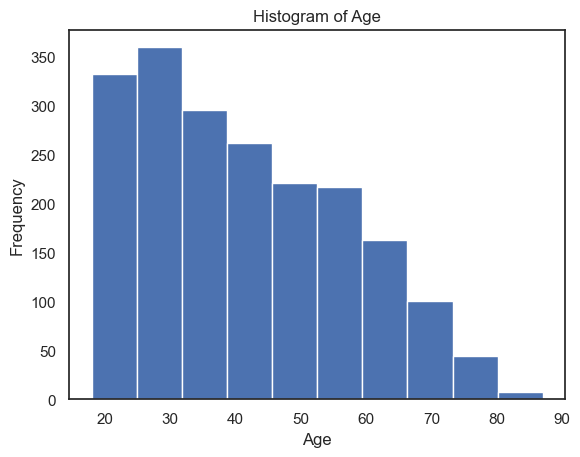

In [180]:
plt.hist(df_survey_imputed.id_bio_age)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

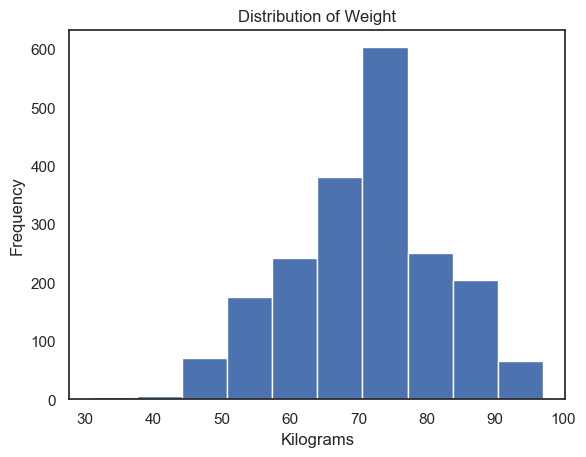

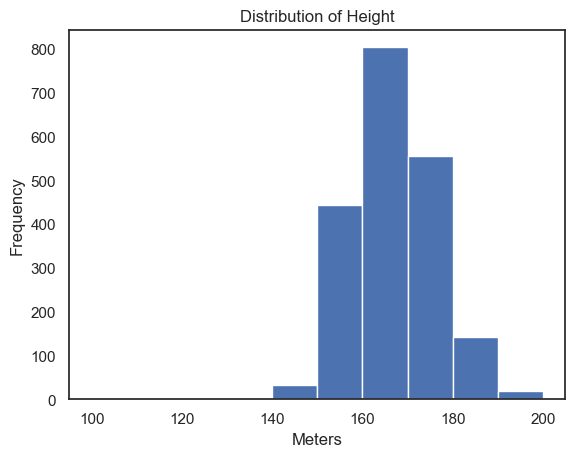

Text(0.5, 1.0, 'Distribution of BMI')

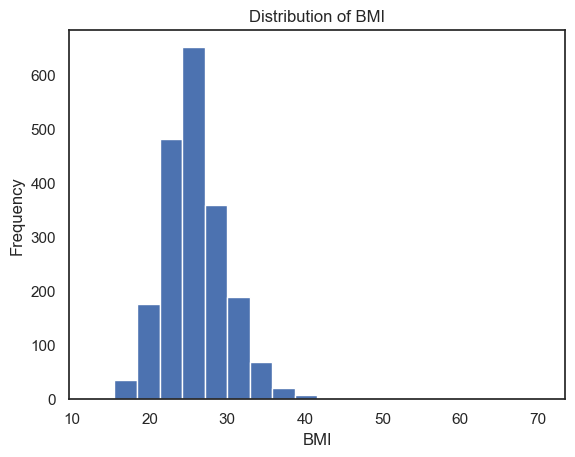

In [181]:
# Plot the distribution of weight
plt.hist(df_survey_imputed.id_bio_weight)
plt.xlabel("Kilograms")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")
plt.show()

# Plot the distribution of height
plt.hist(df_survey_imputed.id_bio_height)
plt.xlabel("Meters")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

# Calculate the BMI and plot its distribution
df_survey_imputed["id_bio_bmi"] = (
    df_survey_imputed["id_bio_weight"] /
    (df_survey_imputed["id_bio_height"] / 100) ** 2
)
plt.hist(df_survey_imputed.id_bio_bmi, bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")


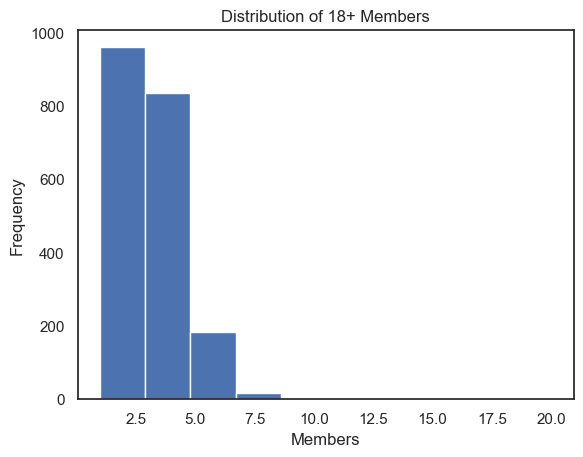

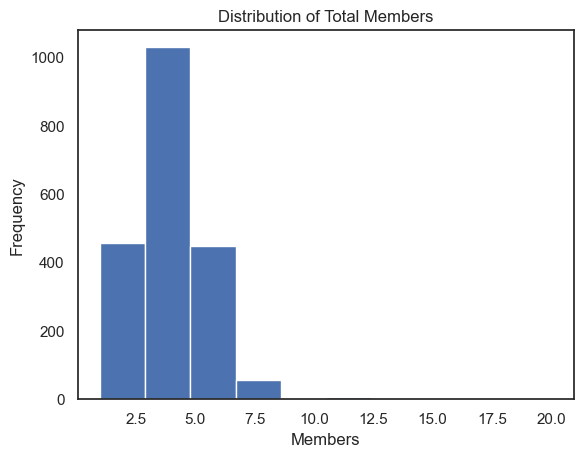

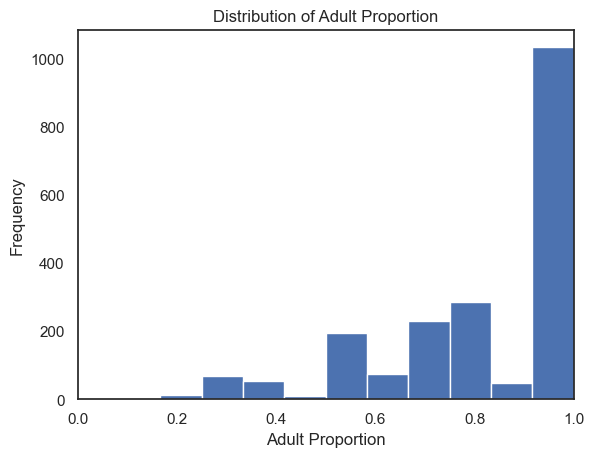

In [182]:
plt.hist(df_survey_imputed.id_mat_18_plus_household_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of 18+ Members")
plt.show()

plt.hist(df_survey_imputed.id_mat_total_household_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Total Members")
plt.show()

df_survey_imputed["id_mat_adult_prop"] = (
    df_survey_imputed["id_mat_18_plus_household_members"]
    / df_survey_imputed["id_mat_total_household_members"]
)

df_survey_imputed = df_survey_imputed.assign(
    id_mat_adult_prop=lambda df: np.where(
        df["id_mat_adult_prop"] > 1, 1, df["id_mat_adult_prop"]
    )
)

plt.hist(df_survey_imputed.id_mat_adult_prop, bins=10)
plt.xlabel("Adult Proportion")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.title("Distribution of Adult Proportion")
plt.show()

In [183]:
# Clean unused variables

df_survey_imputed = df_survey_imputed.drop(
    columns=[
        "id_bio_weight",
        "id_bio_height",
        "id_mat_18_plus_household_members",
        "id_mat_total_household_members",
    ]
)
df_survey_imputed.head()

,id_bio_age,id_bio_disability,id_bio_vaccination_status,sd_occ_current_job,id_bio_bubble_contag,sd_inc_income_problems,sd_cul_religion,id_beh_risk_personal,id_bio_comorbidities,id_beh_percep_contag,...,sd_eth_is_costa_rican,id_beh_percep_severity,sd_inc_income_level,id_bio_masculine,id_psy_vaccination_myths,sd_cul_holiday_season,sd_edu_scholarity,id_beh_risk_others,id_bio_bmi,id_mat_adult_prop
0,52.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,26.196187,1.000000
1,68.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,23.255019,1.000000
2,36.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,30.778701,0.666667
3,78.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,25.333333,1.000000
4,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,24.074074,1.000000


In [184]:
X_train, X_test, y_train, y_test = train_test_split(
    df_survey_imputed,
    df_survey[y],
    test_size=0.2,
    random_state=40,
    stratify=df_survey[y],
)


print("#" * 5 + " Split sample " + "#" * 5)
print("train:%d, test:%d" % (len(y_train.index), len(y_test.index)))
print("#" * 5 + " Distribution Train Sample " + "#" * 5)
print(y_train.value_counts() / len(y_train))
print("#" * 5 + " Distribution Test Sample " + "#" * 5)
print(y_test.value_counts() / len(y_test))

train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)


##### Split sample #####
train:1602, test:401
##### Distribution Train Sample #####
covid19
False    0.730961
True     0.269039
Name: count, dtype: float64
##### Distribution Test Sample #####
covid19
False    0.730673
True     0.269327
Name: count, dtype: float64


In [185]:
# Inicializar h2o
# h2o.cluster().shutdown()

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 6 mins
H2O_cluster_timezone:,America/Costa_Rica
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_maikol_vcm8ft
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.985 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [186]:
train.columns

Index(['covid19', 'id_bio_age', 'id_bio_disability',
       'id_bio_vaccination_status', 'sd_occ_current_job',
       'id_bio_bubble_contag', 'sd_inc_income_problems', 'sd_cul_religion',
       'id_beh_risk_personal', 'id_bio_comorbidities', 'id_beh_percep_contag',
       'id_beh_physical_act', 'id_bio_outside_bubble_contag',
       'id_psy_anxiety_sympt', 'id_bio_death_covid', 'sd_eth_is_costa_rican',
       'id_beh_percep_severity', 'sd_inc_income_level', 'id_bio_masculine',
       'id_psy_vaccination_myths', 'sd_cul_holiday_season',
       'sd_edu_scholarity', 'id_beh_risk_others', 'id_bio_bmi',
       'id_mat_adult_prop'],
      dtype='object')

In [187]:
# Convertir a h2o
col_types = {
    "covid19": "enum",
    "id_beh_percep_contag": "enum",
    "id_beh_percep_severity": "enum",
    "id_bio_bubble_contag": "enum",
    "id_bio_outside_bubble_contag": "enum",
    "id_bio_death_covid": "enum",
    "id_beh_risk_personal": "enum",
    "id_beh_risk_others": "enum",
    "id_beh_physical_act": "enum",
    "id_psy_vaccination_myths": "enum",
    "id_bio_vaccination_status": "enum",
    "id_psy_anxiety_sympt": "enum",
    "sd_inc_income_problems": "enum",
    "sd_inc_income_level": "enum",
    "sd_cul_holiday_season": "enum",
    "id_bio_masculine": "enum",
    "id_bio_age": "numeric",
    "id_bio_bmi": "numeric",
    #    "id_bio_weight": "numeric",
    #   "id_bio_height": "numeric",
    "sd_edu_scholarity": "enum",
    "sd_occ_current_job": "enum",
    "sd_eth_is_costa_rican": "enum",
    "id_bio_comorbidities": "enum",
    "sd_cul_religion": "enum",
    "id_bio_disability": "enum",
    "id_mat_adult_prop": "numeric",
    # "id_mat_18_plus_household_members": "numeric",
    # "id_mat_total_household_members": "numeric",
}

train_h2o = h2o.H2OFrame(train, column_types=col_types)
test_h2o = h2o.H2OFrame(test, column_types=col_types)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [188]:
train_h2o.types

{'covid19': 'enum',
 'id_bio_age': 'int',
 'id_bio_disability': 'enum',
 'id_bio_vaccination_status': 'enum',
 'sd_occ_current_job': 'enum',
 'id_bio_bubble_contag': 'enum',
 'sd_inc_income_problems': 'enum',
 'sd_cul_religion': 'enum',
 'id_beh_risk_personal': 'enum',
 'id_bio_comorbidities': 'enum',
 'id_beh_percep_contag': 'enum',
 'id_beh_physical_act': 'enum',
 'id_bio_outside_bubble_contag': 'enum',
 'id_psy_anxiety_sympt': 'enum',
 'id_bio_death_covid': 'enum',
 'sd_eth_is_costa_rican': 'enum',
 'id_beh_percep_severity': 'enum',
 'sd_inc_income_level': 'enum',
 'id_bio_masculine': 'enum',
 'id_psy_vaccination_myths': 'enum',
 'sd_cul_holiday_season': 'enum',
 'sd_edu_scholarity': 'enum',
 'id_beh_risk_others': 'enum',
 'id_bio_bmi': 'real',
 'id_mat_adult_prop': 'real'}

In [189]:
max_models = 500
excluded_algos = ["StackedEnsemble", "DeepLearning"]

# # Definir modelo y entrenar
# aml = H2OAutoML(
#     nfolds=10,
#     max_models=max_models,
#     max_runtime_secs=3600,
#     seed=42,
#     stopping_metric="aucpr",
#     sort_metric="aucpr",
#     balance_classes=False,
#     exclude_algos=excluded_algos,
# )


In [190]:
# aml.train(y=y, training_frame=train_h2o)
# h2o.save_model(
#     aml.leader,
#     path="models/",
#     force=True,
#     filename="aml_leader_model",
#     export_cross_validation_predictions=True,
# )


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


'/Users/maikol/OneDrive/home/documents/2023/2023_03_paper_triageml_cr2021/Paper-COVID-MLTriage-CR2021/models/aml_leader_model'

In [191]:
if "aml" in locals() and isinstance(aml, h2o.automl.autoh2o.H2OAutoML):
    aml_leader = aml.leader
else:
    aml_leader = h2o.load_model("models/aml_leader_model")

In [205]:
aml_leader


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20231001_91432_model_301


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          5205                   4            4            4             6             13            10.7407

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13904038914279254
RMSE: 0.3728811997711772
LogLoss: 0.4407528688196049
Mean Per-Class Error: 0.20879391956821958
AUC: 0.8599982960208123
AUCPR: 0.7212028429745673
Gini: 0.7199965920416247

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.332096605394148
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  970      201     0.1716   (201.0/1171.0)
True   106      325     0.2459   (106.0/431.0)
Total  1076     526     0.1916   (307.0/1602.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.332097     0.679206  197
max f2                       0.202557     0.755601  272
max f0point5                 0.442384     0.683863  126
max accuracy                 0.430046     0.82397   135
max precision                0.6928       1         0
max recall                   0.115189     1         387
max specificity              0.6928       1         0
max absolute_mcc             0.332097     0.549982  197
max min_per_class_accuracy   0.275058     0.784223  227
max mean_per_class_accuracy  0.317503     0.791883  204
max tns                      0.6928       1171      0
max fns                      0.6928       430       0
max fps                      0.0979403    1171      399
max tps                      0.115189     431       387
max tnr                      0.6928       1         0
max fnr                      0.6928       0.99768   0
max fpr                      0.0979403    1         399
max tpr                      0.115189     1         387

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 27.04 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106117                   0.634157           3.71694    3.71694            1                0.656845  1                           0.656845            0.0394432       0.0394432                  271.694   271.694            0.0394432
2        0.0205993                   0.602307           3.48463    3.6043             0.9375           0.615205  0.969697                    0.636656            0.0348028       0.0742459                  248.463   260.43             0.073392
3        0.0305868                   0.58792            3.25232    3.48937            0.875            0.593789  0.938776                    0.622658            0.0324826       0.106729                   225.232   248.937            0.104167
4        0.0405743                   0.568661           3.02001    3.37384            0.8125           0.57717   0.907692                    0.611461            0.0301624       0.136891                   202.001   237.384            0.131767
5        0.0505618                   0.55694            3.02001    3.30394            0.8125           0.563215

In [192]:
aml_leader.algo

'gbm'

In [193]:
aml_leader.save_model_details(
    path="models/", force=True, filename="aml_leader_model_details"
)


'/Users/maikol/OneDrive/home/documents/2023/2023_03_paper_triageml_cr2021/Paper-COVID-MLTriage-CR2021/models/aml_leader_model_details'

In [194]:
aml_leader.summary()

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,27.0,27.0,5205.0,4.0,4.0,4.0,6.0,13.0,10.740741


In [195]:
# Performance del modelo

perf = aml_leader.model_performance(test_data=test_h2o)
prevalence = sum(df_survey.covid19) / len(df_survey)
threshold = perf.F1()[0][0]
sensitivity = perf.recall(thresholds=[threshold])[0][1]
specificity = perf.specificity(thresholds=[threshold])[0][1]
F1 = perf.F1(thresholds=[threshold])[0][1]
AUC = perf.auc()
AUC_PR = perf.aucpr()
precision = perf.precision(thresholds=[threshold])[0][1]
accuracy = perf.accuracy(thresholds=[threshold])[0][1]


print("Prevalence", prevalence)
print("Threshold", threshold)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1:", F1)
print("AUC:", AUC)
print("AUC_PR:", AUC_PR)
print(perf.confusion_matrix(thresholds=[threshold]))


Prevalence 0.2690963554667998
Threshold 0.3567857713267435
Sensitivity: 0.7777777777777778
Specificity: 0.7918088737201365
Precision: 0.5793103448275863
Accuracy: 0.7880299251870324
F1: 0.6640316205533596
AUC: 0.8139615724939957
AUC_PR: 0.5838902896835552
Confusion Matrix (Act/Pred) @ threshold = 0.3567857713267435
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  232      61      0.2082   (61.0/293.0)
True   24       84      0.2222   (24.0/108.0)
Total  256      145     0.212    (85.0/401.0)


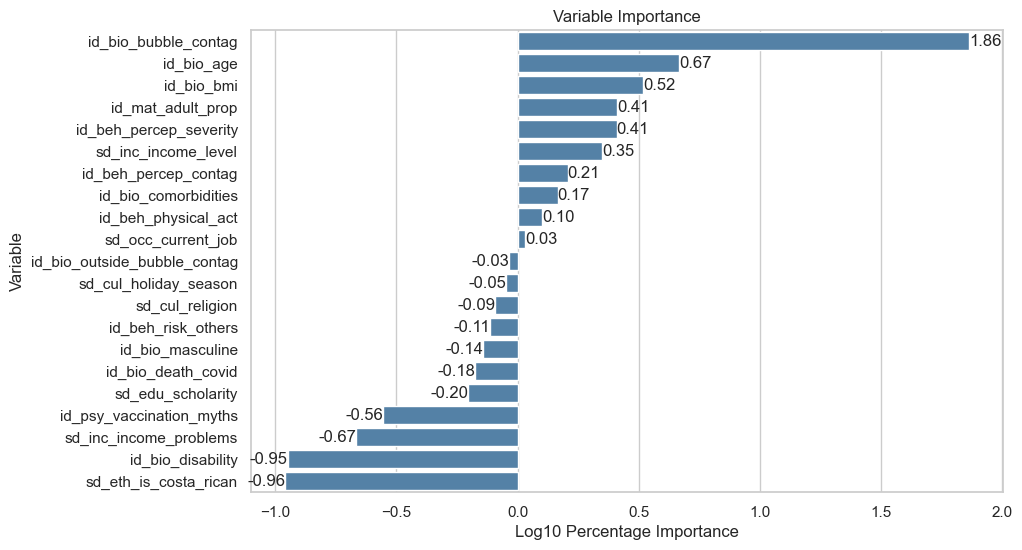

In [196]:
# Get variable importance data
var_imp = aml_leader.varimp(use_pandas=True)

# Filter only the variables with positive scaled_importance value
var_imp = var_imp[var_imp["percentage"] > 0]
var_imp["log_scaled_importance"] = np.log10(var_imp["percentage"] * 100)

h = 6
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="variable", data=var_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Variable Importance")
plt.xlabel("Log10 Percentage Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_var_imp.pdf", bbox_inches="tight")
plt.show()

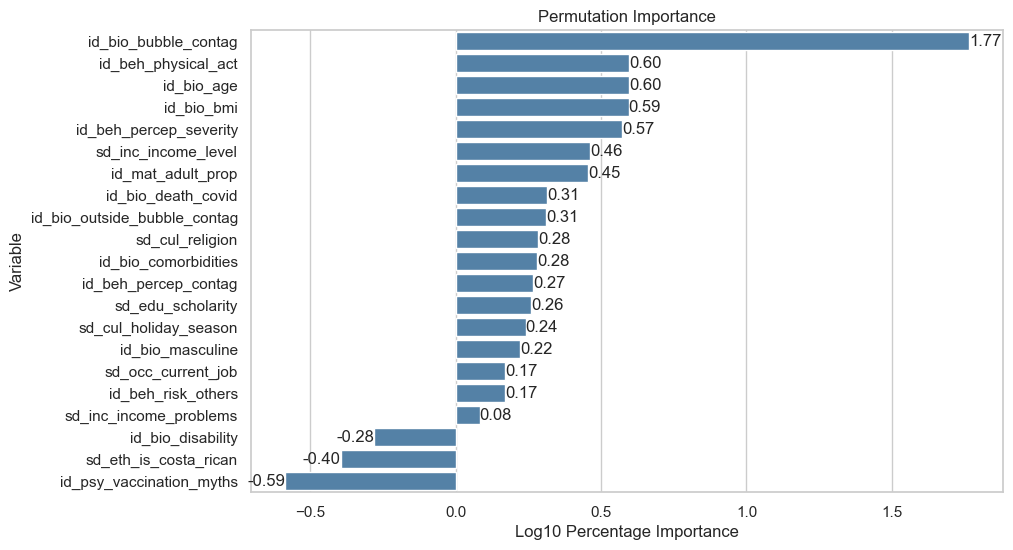

In [197]:
perm_imp = aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=100, metric="PR_AUC", seed=42
)
perm_imp = perm_imp.as_data_frame()
perm_imp["mean"] = perm_imp[perm_imp.columns[1:]].mean(axis=1)
perm_imp = perm_imp.sort_values(by="mean", ascending=False)
perm_imp["Scaled Importance"] = perm_imp["mean"] / perm_imp["mean"].sum()

# perm_imp = perm_imp.as_data_frame()
perm_imp = perm_imp[perm_imp["Scaled Importance"] > 0]
perm_imp["log_scaled_importance"] = np.log10(perm_imp["Scaled Importance"] * 100)

h = 6
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="Variable", data=perm_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Permutation Importance")
plt.xlabel("Log10 Percentage Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_perm_imp.pdf", bbox_inches="tight")
plt.show()

<Figure size 970.8x600 with 0 Axes>

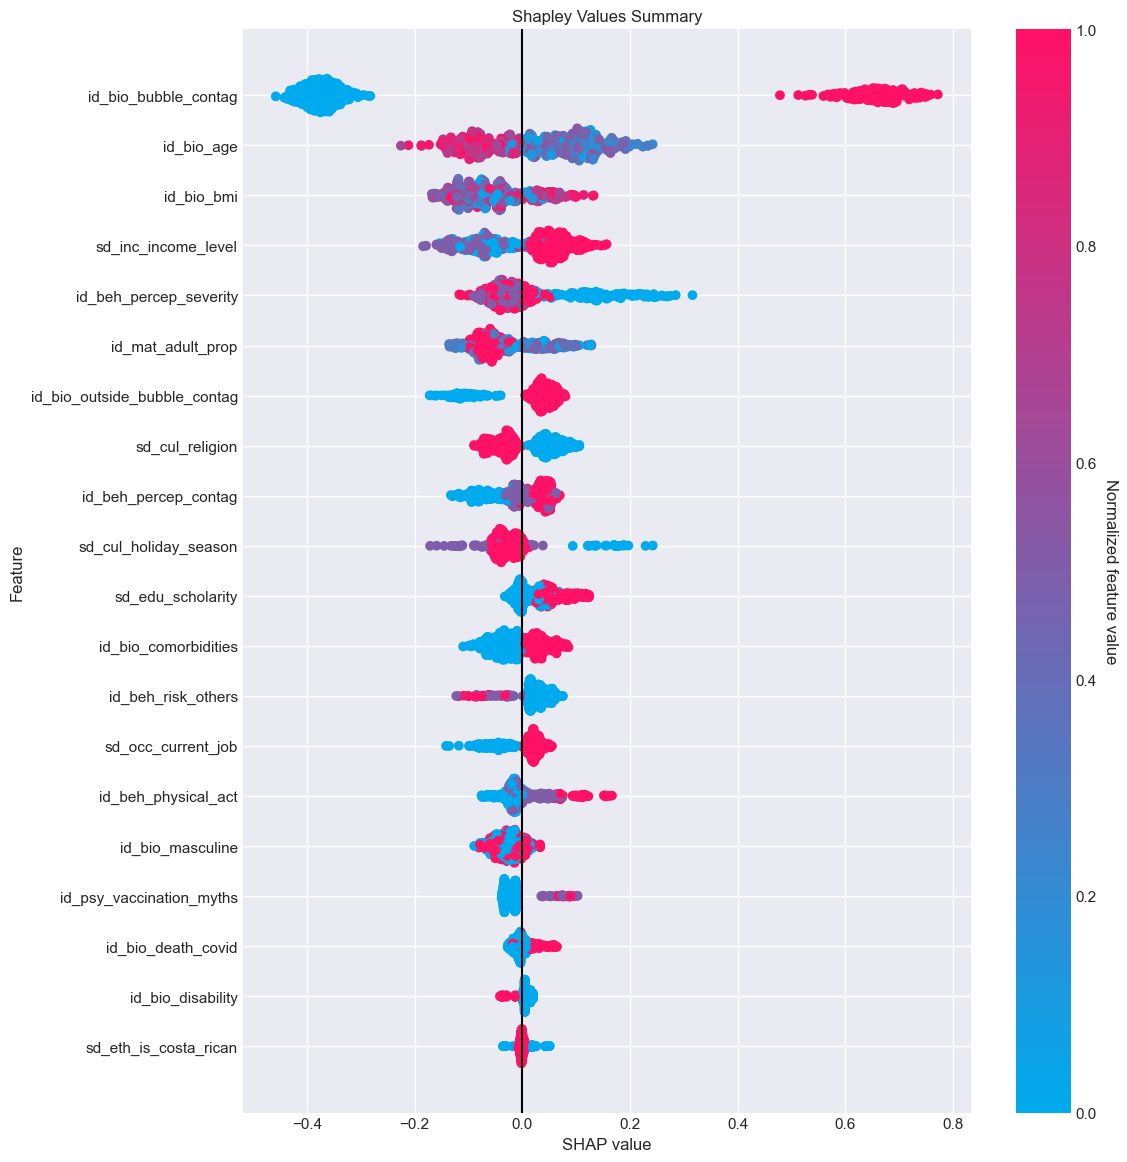

In [198]:
h = 6
w = h * 1.618
plt.rc("font", size=19)
plt.style.use("seaborn-v0_8-dark")
plt.figure(figsize=(w, h))  # set the figure size


shap_plot = aml_leader.shap_summary_plot(test_h2o, alpha=1, samples=3000)


plt.title("Shapley Values Summary")
plt.savefig("img/plot_shap.pdf", bbox_inches="tight")


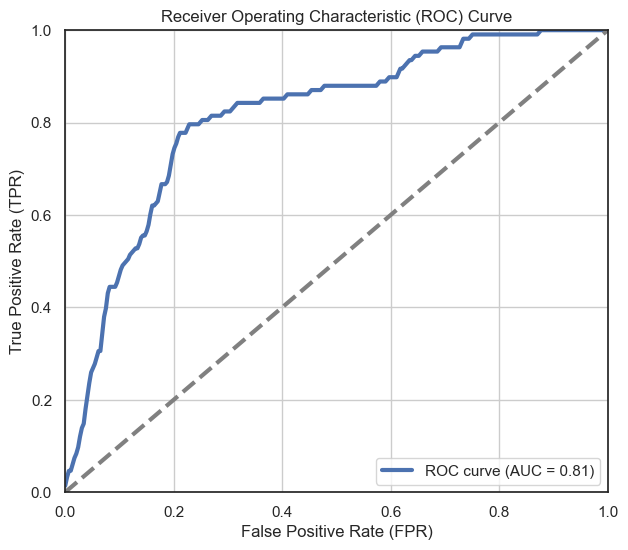

In [199]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

matplotlib.style.use("default")
fprs = perf.fprs
tprs = perf.tprs
auc = perf.auc()

df = pd.DataFrame({"fpr": fprs, "tpr": tprs})

sns.set_theme(style="white")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="fpr",
    y="tpr",
    lw=3,
    data=df,
    err_style=None,
    label="ROC curve (AUC = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="gray", lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_roc.pdf", bbox_inches="tight")
plt.show()

In [200]:
precision = perf.precision(thresholds="all")
recall = perf.recall(thresholds="all")
pr_auc = perf.pr_auc()

precision = [t[1] for t in precision]
recall = [t[1] for t in recall]

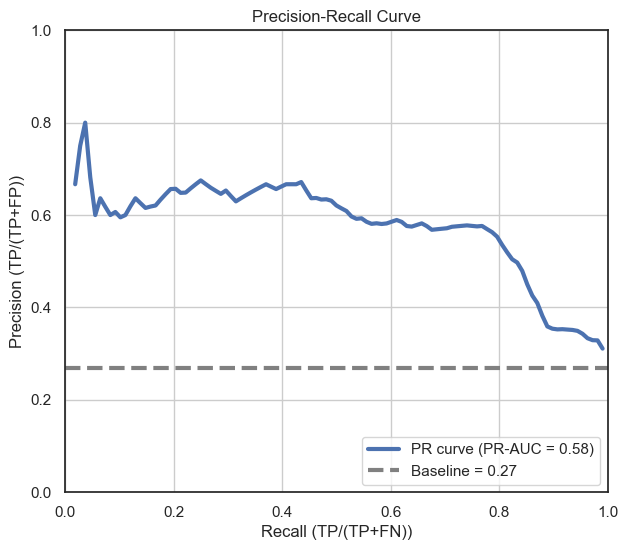

In [201]:
import seaborn as sns
import pandas as pd

precision = perf.precision(thresholds="all")
recall = perf.recall(thresholds="all")
pr_auc = perf.pr_auc()

precision = [t[1] for t in precision]
recall = [t[1] for t in recall]

df = pd.DataFrame({"Recall": recall, "Precision": precision})

df = df.query("Recall >0 & Recall < 1 & Precision >0 & Precision < 1")

sns.set_theme(style="white")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="Recall",
    y="Precision",
    lw=3,
    data=df,
    err_style=None,
    label="PR curve (PR-AUC = %0.2f)" % pr_auc,
)
plt.plot(
    [0, 1],
    [prevalence, prevalence],
    color="gray",
    lw=3,
    linestyle="--",
    label="Baseline = %0.2f" % prevalence,
)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Recall (TP/(TP+FN))")
plt.ylabel("Precision (TP/(TP+FP))")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_pr.pdf", bbox_inches="tight")
plt.show()

In [202]:
# Variable importance
aml_leader.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,id_bio_bubble_contag,333.708435,1.000000,0.731355
1,id_bio_age,21.169788,0.063438,0.046396
2,id_bio_bmi,15.040176,0.045070,0.032962
3,id_mat_adult_prop,11.759351,0.035238,0.025772
4,id_beh_percep_severity,11.699739,0.035060,0.025641
5,sd_inc_income_level,10.209816,0.030595,0.022376
6,id_beh_percep_contag,7.338428,0.021991,0.016083
7,id_bio_comorbidities,6.676035,0.020006,0.014631
8,id_beh_physical_act,5.766045,0.017279,0.012637
9,sd_occ_current_job,4.919832,0.014743,0.010782


In [203]:
# Permutation importance
aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=5, metric="PR_AUC", use_pandas=True
)


,Run 1,Run 2,Run 3,Run 4,Run 5
Variable,,,,,
id_bio_bubble_contag,0.290117,0.279594,0.274821,0.258943,0.244389
id_mat_adult_prop,0.027128,0.003698,0.027546,0.022507,0.014951
id_beh_percep_severity,0.025187,0.024762,0.005467,0.014894,0.018148
sd_inc_income_level,0.017497,0.033231,0.034662,0.003060,0.031404
id_bio_death_covid,0.012673,0.003243,0.002425,0.003147,0.010413
id_beh_percep_contag,0.012159,0.000362,0.026214,0.007004,0.004743
id_beh_risk_others,0.010481,0.001211,0.007674,0.008482,0.006215
id_bio_masculine,0.009637,0.019025,0.005204,0.016618,0.004586
id_beh_physical_act,0.008327,0.001182,0.021386,0.030409,0.008038


Cálculo sin burbuja

In [204]:
# Guardar parametros
model_parameters = pd.DataFrame(
    {
        "prevalence": [prevalence],
        "threshold": [threshold],
        "sens_model": sensitivity,
        "spec_model": specificity,
        "people": test_h2o.nrow,
    }
)
print(model_parameters)
model_parameters.to_pickle(path="data/model_parameters.pkl")


   prevalence  threshold  sens_model  spec_model  people
0    0.269096   0.356786    0.777778    0.791809     401
